<div style="
    background-color: #9EFADD; 
    color: black; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    🛒 Superstore Sales Data Analysis using Python
</div>


### 📘 Overview:
## This project analyzes sales data from a Superstore to uncover insights about customer segments, product categories, regions, and profitability.

### 🧰 Tools Used:
## Python • Pandas • Matplotlib • Seaborn

### 🎯 Objective:
## To explore and visualize sales performance trends and derive business insights that can help improve sales strategy and profitability.


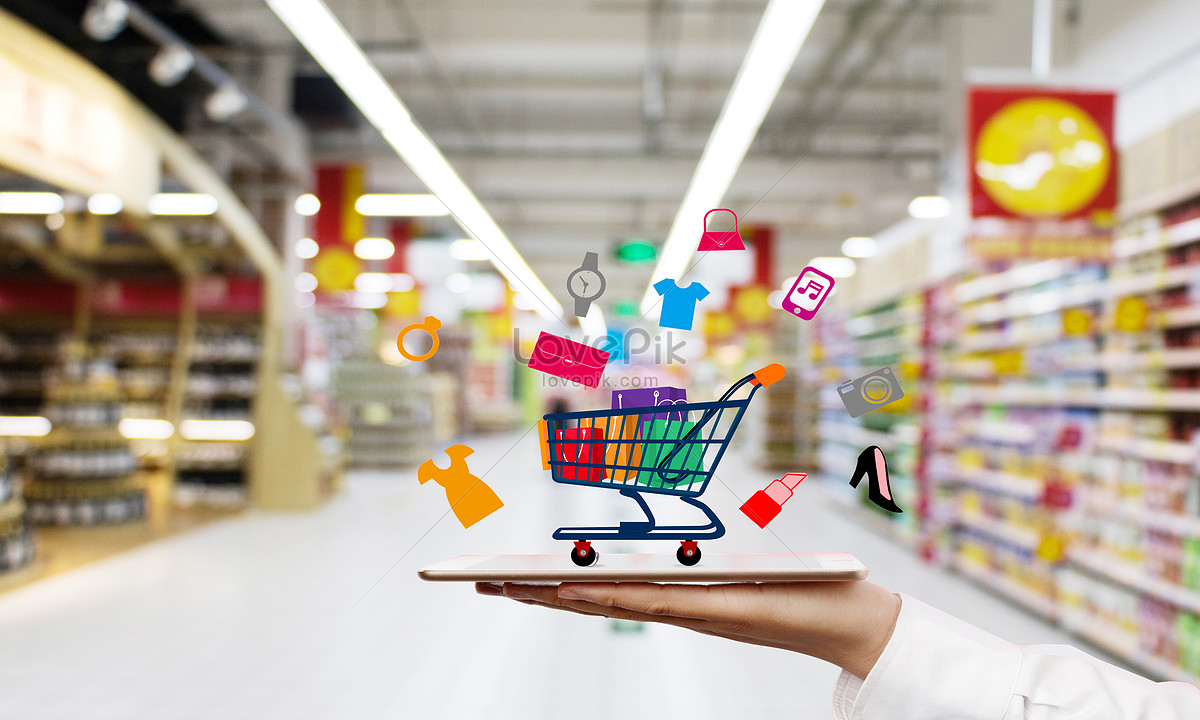

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="
    background-color: #9EFADD; 
    color: black; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Importing Data and Exploring Column Information
</div>


In [4]:
data=pd.read_csv(r"E:\Data analytics\python\project datasets\archive (1)\Sample - Superstore.csv", encoding='latin1')
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [5]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
data=data[['Order Date', 'Ship Mode',
       'Segment',
       'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']]

In [7]:
data.head(3)

,Order Date,Ship Mode,Segment,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11/8/2016,Second Class,Consumer,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,11/8/2016,Second Class,Consumer,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,6/12/2016,Second Class,Corporate,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    9994 non-null   object 
 1   Ship Mode     9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sub-Category  9994 non-null   object 
 6   Product Name  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


In [9]:
data["Order Date"]=pd.to_datetime(data['Order Date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Mode     9994 non-null   object        
 2   Segment       9994 non-null   object        
 3   Region        9994 non-null   object        
 4   Category      9994 non-null   object        
 5   Sub-Category  9994 non-null   object        
 6   Product Name  9994 non-null   object        
 7   Sales         9994 non-null   float64       
 8   Quantity      9994 non-null   int64         
 9   Discount      9994 non-null   float64       
 10  Profit        9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 859.0+ KB


In [11]:
data.describe()

,Order Date,Sales,Quantity,Discount,Profit
count,9994,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.245101,2.225110,0.206452,234.260108


In [12]:
data.describe(include="object")

,Ship Mode,Segment,Region,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994
unique,4,3,4,3,17,1850
top,Standard Class,Consumer,West,Office Supplies,Binders,Staple envelope
freq,5968,5191,3203,6026,1523,48


In [13]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [14]:
data.drop_duplicates(inplace=True)


<div style="
    background-color: #9EFADD; 
    color: black; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
  🔎 Removing Invalid Sales Values


</div>


In [ ]:
data=data[data['Sales']>0]

In [15]:
    # data=data[data['Profit']>0]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9993 non-null   datetime64[ns]
 1   Ship Mode     9993 non-null   object        
 2   Segment       9993 non-null   object        
 3   Region        9993 non-null   object        
 4   Category      9993 non-null   object        
 5   Sub-Category  9993 non-null   object        
 6   Product Name  9993 non-null   object        
 7   Sales         9993 non-null   float64       
 8   Quantity      9993 non-null   int64         
 9   Discount      9993 non-null   float64       
 10  Profit        9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 936.8+ KB


In [17]:
data.describe()

,Order Date,Sales,Quantity,Discount,Profit
count,9993,9993.000000,9993.000000,9993.000000,9993.000000
mean,2016-04-30 01:53:33.089162240,229.852846,3.789753,0.156188,28.660971
min,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,17.280000,2.000000,0.000000,1.731000
50%,2016-06-26 00:00:00,54.480000,3.000000,0.200000,8.671000
75%,2017-05-14 00:00:00,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,22638.480000,14.000000,0.800000,8399.976000
std,NaN,623.276074,2.225149,0.206457,234.271476


In [18]:
data.isna().sum()

Order Date      0
Ship Mode       0
Segment         0
Region          0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<div style="
    background-color: #9EFADD; 
    color: black; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Detecting Outliers
</div>


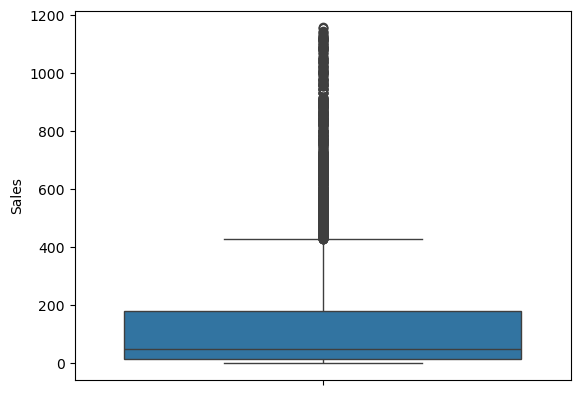

In [37]:
sns.boxplot(data['Sales'])
plt.show()

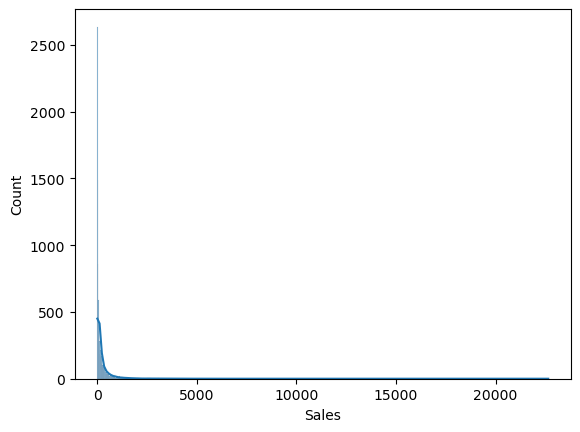

In [20]:
sns.histplot(data["Sales"] ,kde=True)
plt.show()

,Order Date,Sales,Quantity,Discount,Profit
count,9626,9626.000000,9626.000000,9626.000000,9626.000000
mean,2016-04-30 08:53:00.386453248,147.024801,3.702992,0.157031,15.609485
min,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-1850.946400
25%,2015-05-25 00:00:00,16.400000,2.000000,0.000000,1.676550
50%,2016-06-26 00:00:00,48.942000,3.000000,0.200000,8.118000
75%,2017-05-14 00:00:00,180.960000,5.000000,0.200000,26.070000
max,2017-12-30 00:00:00,1159.056000,14.000000,0.800000,496.786500
std,NaN,216.914913,2.165175,0.207554,77.096713


<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">
    Removing Sales with Exponentially high Values, 1.5 Standard Deviation Away
</div>


In [22]:
outlier=np.mean(data['Sales'])+1.5*np.std(data['Sales'])

In [23]:
outlier

np.float64(1164.7201769896617)

In [24]:
data=data[data['Sales']<outlier]

In [25]:
data.describe()

,Order Date,Sales,Quantity,Discount,Profit
count,9626,9626.000000,9626.000000,9626.000000,9626.000000
mean,2016-04-30 08:53:00.386453248,147.024801,3.702992,0.157031,15.609485
min,2014-01-03 00:00:00,0.444000,1.000000,0.000000,-1850.946400
25%,2015-05-25 00:00:00,16.400000,2.000000,0.000000,1.676550
50%,2016-06-26 00:00:00,48.942000,3.000000,0.200000,8.118000
75%,2017-05-14 00:00:00,180.960000,5.000000,0.200000,26.070000
max,2017-12-30 00:00:00,1159.056000,14.000000,0.800000,496.786500
std,NaN,216.914913,2.165175,0.207554,77.096713


In [26]:
data.describe(include="object")

,Ship Mode,Segment,Region,Category,Sub-Category,Product Name
count,9626,9626,9626,9626,9626,9626
unique,4,3,4,3,17,1821
top,Standard Class,Consumer,West,Office Supplies,Binders,Staple envelope
freq,5758,5010,3084,5935,1484,48


<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">🥧 Sales Contribution by Category
</div>


In [46]:
# identifing which categary has highest sales
category_sales=data.groupby(by='Category').agg({'Sales':'sum'})
category_sales.sort_values(by="Sales",ascending=False)
category_sales

,Sales
Category,
Furniture,494446.8487
Office Supplies,501077.8690
Technology,419736.0200


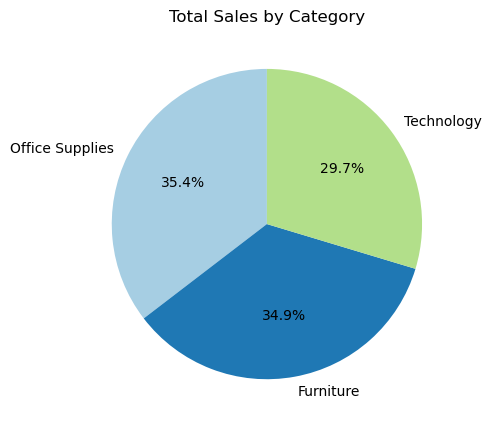

In [27]:
# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(
    category_sales['Sales'], 
    labels=category_sales.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=plt.cm.Paired.colors
)

plt.title("Total Sales by Category")
plt.tight_layout()
plt.show()


<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">🥧 Orders by Customer Segment
</div>


In [48]:
# “Which customer segment (Consumer, Corporate, Home Office) contributes most to the company’s sales?”
#Segment Contribution (Customer Segmentation Analysis)
segments=data.groupby(by='Segment').agg(count_of_segment=('Segment','count'))
segments

,count_of_segment
Segment,
Consumer,5010
Corporate,2905
Home Office,1711


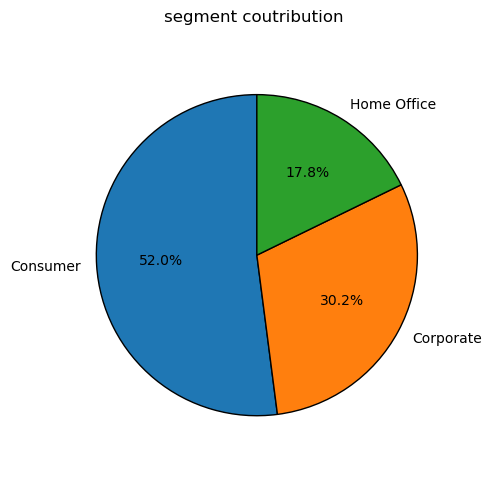

In [28]:
segments=segments.reset_index()
plt.figure(figsize=(5,5))
plt.pie(
    segments["count_of_segment"],
    labels=segments['Segment'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("segment coutribution ")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()

In [29]:
category_sales=data.groupby(by='Category').agg(count_of_category=('Category','count'))
category_sales.sort_values(by="count_of_category",ascending=False)

,count_of_category
Category,
Office Supplies,5935
Furniture,1988
Technology,1703


In [30]:
category_sales=data.groupby(['Category','Sub-Category']).agg(count_of_category=('Sub-Category','count'))
category_sales

count_of_category
Category        Sub-Category                   
Furniture       Bookcases                   205
                Chairs                      555
                Furnishings                 955
                Tables                      273
Office Supplies Appliances                  450
                Art                         796
                Binders                    1484
                Envelopes                   254
                Fasteners                   217
                Labels                      364
                Paper                      1370
                Storage                     818
                Supplies                    182
Technology      Accessories                 752
                Copiers                      35
                Machines                     75
                Phones                      841

<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">📊 Total Sales by Region
</div>


In [49]:
# Shows which regions generate the most revenue.
region_sales = data.groupby("Region").agg(sum_of_sales_by_region=("Sales","sum"))
region_sales


,sum_of_sales_by_region
Region,
Central,318789.2422
East,400368.0210
South,227869.0590
West,468234.4155


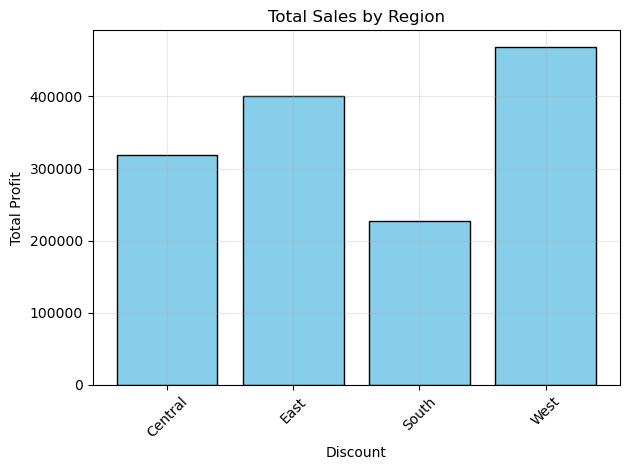

In [31]:
region_sales.reset_index()
plt.bar(region_sales.index, region_sales["sum_of_sales_by_region"], color="skyblue", edgecolor="black")
plt.xlabel("Discount")
plt.ylabel("Total Profit")
plt.title("Total Sales by Region")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">📈 Monthly Sales Trend
</div>


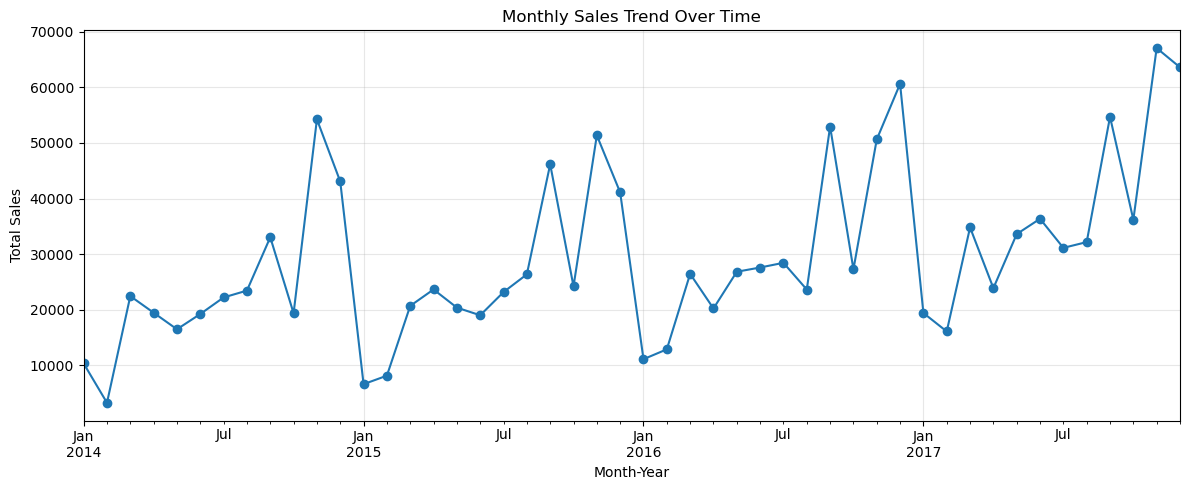

In [33]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month_Year'] = data['Order Date'].dt.to_period('M')

monthly_sales = data.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


<div style="
    background-color: #9EFADD; 
    color: balck; 
    padding: 15px; 
    border-radius: 10px; 
    text-align: center; 
    font-size: 28px; 
    font-weight: bold;
">Discount vs Sales Relationship
</div>


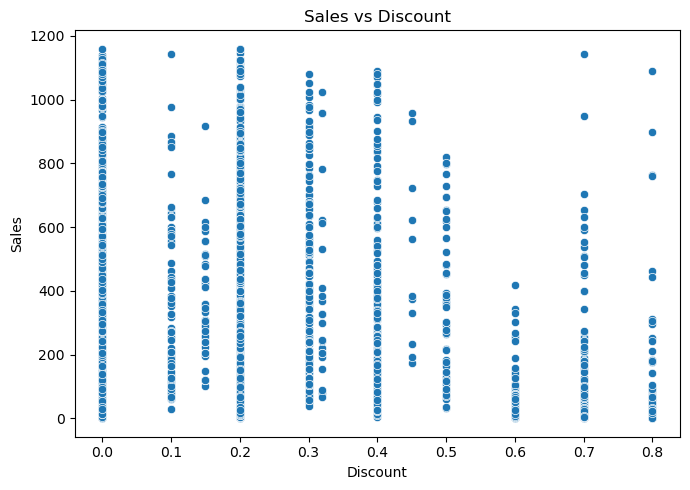

In [50]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='Discount', y='Sales')
plt.title("Sales vs Discount")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


# 📌 Final Insights and Recommendations (Short Version)

## **Key Insights**

### **Sales Performance**
- **Office Supplies** recorded the highest overall sales.
- **Technology products** had fewer orders but higher value per transaction.

### **Regional Trends**
- The **West region** showed the strongest sales performance.
- The **East region** had the lowest sales and needs attention.

### **Monthly Trend**
- Sales peak in **November and December**, indicating strong seasonal demand.

### **Discount Patterns**
- Higher discounts generally helped increase sales.
- Extremely high discounts did not always produce proportionally higher sales.

### **Customer Segments**
- The **Consumer segment** placed the most orders.
- The **Corporate segment** often purchased higher-value items.

---

## **Recommendations**

### **Strengthen High-Performing Areas**
- Maintain strong inventory for **Office Supplies**.
- Increase promotions for **Technology** to leverage high-value sales.

### **Improve Low-Performing Regions**
- Boost marketing and targeted discounts in the **East region**.

### **Seasonal Strategy**
- Prepare inventory and promotional campaigns for **Q4**, especially Nov–Dec.

### **Smart Discounting**
- Use **moderate discounts (10–30%)** to maximize sales without major margin loss.

### **Segment-Focused Strategy**
- Continue engagement offers for **Consumer** customers.
- Provide bundle or bulk deals for **Corporate clients**.

---

✔ **Overall:**  
Sales are driven mainly by Office Supplies, seasonal peaks, and consumer customers. Strategic discounting, regional improvements, and optimized inventory planning can significantly enhance performance.



<div style="background-color:#9EFADD; padding:25px; border-radius:12px; text-align:center;">
  <h1 style="color:vblack;">✅ Thank You</h1>
</div>

<p style="text-align:center; color:gray; font-size:14px; margin-top:10px;">
  Airbnb Paris Analysis | 2025
</p>
